# Cargar **librerias**

In [ ]:
import zipfile
import os
import cv2
from tqdm import tqdm
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

**Cargar datos sin aumentar**

In [ ]:


!wget --no-check-certificate \
    "https://github.com/arbeyvillegas/IntrDeepLearning/raw/main/Entrega-02/data/brain_tumor_images_training.npz" \
    -O "/tmp/brain_tumor_images_training.npz"

!wget --no-check-certificate \
    "https://github.com/arbeyvillegas/IntrDeepLearning/raw/main/Entrega-02/data/brain_tumor_images_test.npz" \
    -O "/tmp/brain_tumor_images_test.npz"

--2023-11-18 00:23:47--  https://github.com/arbeyvillegas/IntrDeepLearning/raw/main/Entrega-02/data/brain_tumor_images_training.npz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/arbeyvillegas/IntrDeepLearning/main/Entrega-02/data/brain_tumor_images_training.npz [following]
--2023-11-18 00:23:48--  https://media.githubusercontent.com/media/arbeyvillegas/IntrDeepLearning/main/Entrega-02/data/brain_tumor_images_training.npz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80070719 (76M) [application/octet-stream]
Saving to: ‘/tmp/brain_tumor_images_training.npz’

/tmp/brain_tumor_i

**Cargar datos aumentados**

In [ ]:
!wget --no-check-certificate \
    "https://github.com/arbeyvillegas/IntrDeepLearning/raw/main/Entrega-02/data/brain_tumor_images_training_aug.npz" \
    -O "/tmp/brain_tumor_images_training.npz"

!wget --no-check-certificate \
    "https://github.com/arbeyvillegas/IntrDeepLearning/raw/main/Entrega-02/data/brain_tumor_images_test_aug.npz" \
    -O "/tmp/brain_tumor_images_test.npz"

--2023-11-18 00:24:04--  https://github.com/arbeyvillegas/IntrDeepLearning/raw/main/Entrega-02/data/brain_tumor_images_training_aug.npz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/arbeyvillegas/IntrDeepLearning/main/Entrega-02/data/brain_tumor_images_training_aug.npz [following]
--2023-11-18 00:24:05--  https://media.githubusercontent.com/media/arbeyvillegas/IntrDeepLearning/main/Entrega-02/data/brain_tumor_images_training_aug.npz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152517509 (145M) [application/octet-stream]
Saving to: ‘/tmp/brain_tumor_images_training.npz’

/tmp

In [ ]:
data_train = np.load("/tmp/brain_tumor_images_training.npz")

index_aleatorio: 1829
datos_desde_archivo (5740, 150, 150, 3)
clasificacion_desde_archivo no_tumor


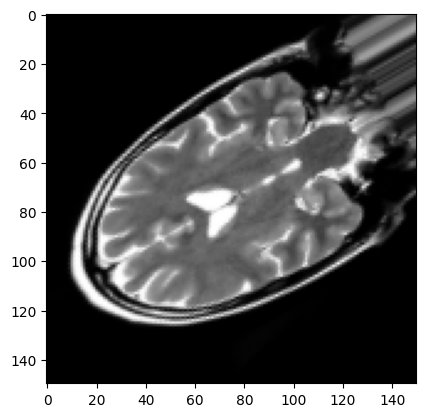

In [ ]:

#index_aleatorio= np.random.randint(0,5740)
index_aleatorio= 1829
print("index_aleatorio:", index_aleatorio)
print("datos_desde_archivo", data_train['x'].shape)
print("clasificacion_desde_archivo",data_train['y'][index_aleatorio])
plt.imshow(data_train['x'][index_aleatorio])

In [ ]:
data_test = np.load("/tmp/brain_tumor_images_test.npz")

index_aleatorio: 290
datos_test (788, 150, 150, 3)
clasificacion_test no_tumor


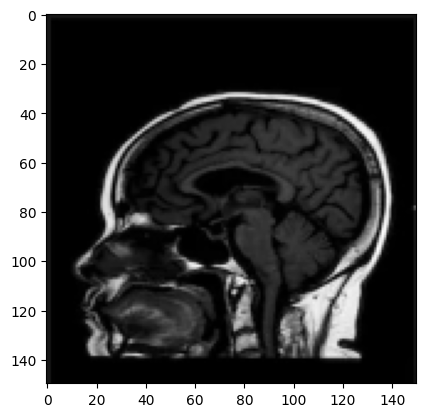

In [ ]:
#index_aleatorio= np.random.randint(0,788)
index_aleatorio= 290
print("index_aleatorio:", index_aleatorio)
print("datos_test", data_test['x'].shape)
print("clasificacion_test",data_test['y'][index_aleatorio])
plt.imshow(data_test['x'][index_aleatorio])

# **Mas librerias**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import time
import numpy as np
import keras.optimizers
from sklearn.metrics import classification_report

In [ ]:
etiquetas = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']



In [ ]:
X_train = data_train['x'].astype('float32')
X_train /= 255
#Y_train = tf.keras.utils.to_categorical([etiquetas.index(item) for item in data_train['y']])
Y_train = np.array([etiquetas.index(item) for item in data_train['y']])

X_test = data_test['x'].astype('float32')
X_test /= 255
#Y_test = tf.keras.utils.to_categorical([etiquetas.index(item) for item in data_test['y']])
Y_test = np.array([etiquetas.index(item) for item in data_test['y']])

# **Entrenar una red neuronal convolusional**

In [ ]:
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
X_train.shape[1:]

(150, 150, 3)

In [3]:
#dense_layers = [0,1, 2]
#layer_sizes = [32, 64, 128]
#conv_layers = [1, 2, 3]
dense_layers = [1]
layer_sizes = [128]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)
            model = Sequential()

            #model.add(Conv2D(layer_size, (3, 3), input_shape=X_train.shape[1:]))
            model.add(Conv2D(layer_size, (3, 3), input_shape=X_train.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())
            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))
                model.add(Dropout(0.33))

            model.add(Dense(4))
            model.add(Activation('softmax'))


            model.compile(loss='sparse_categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy'],
              )
            model.fit(X_train, Y_train,
            batch_size=32,
            epochs=5,
            validation_data=(X_test,Y_test),
            callbacks=[tensorboard,es])

            #Score
            scores = model.evaluate(X_test, Y_test, verbose=1)
            print('Test loss:', scores[0])
            print('Test accuracy:', scores[1])

            #Save model
            model.save("{}-model-{}-accuracy.keras".format(NAME,scores[1]))

            #precision    recall  f1-score   support
            y_pred = model.predict(X_test, batch_size=64, verbose=1)
            y_pred_bool = np.argmax(y_pred, axis=1)
            print(classification_report(Y_test, y_pred_bool))
            print()
            print()
            #Fit the model


3-conv-128-nodes-1-dense-1700445777
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 activation_5 (Activation)   (None, 222, 222, 128)     0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 activation_6 (Activation)   (None, 109, 109, 128)     0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)             

In [6]:
batch_size = 16
nb_classes = 4
nb_epochs = 10
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(X_train.shape[1:])),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4,  activation=tf.nn.softmax)
])
#model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#model.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (X_test, Y_test), callbacks=[tensorboard])
model.summary()
#Score
#scores = model.evaluate(X_test, Y_test, verbose=1)
#print('Test loss:', scores[0])
#print('Test accuracy:', scores[1])

#NAME = "{}-batchsize-{}-layersize-{}-epochs-{}".format(batch_size, 128, nb_epochs, int(time.time()))

#model.save("{}-model-{}-accuracy.keras".format(NAME,scores[1]))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 56, 56, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 100352)           